In [1]:
# http://systems-sciences.uni-graz.at/etextbook/sw2/lyapunov.html
# alapján julia-ra atirva

using Plots
using LaTeXStrings

# the range for lambda's is an optional parameter
Eltolt(_lim=nothing)=(
  φ=(x,λ)->x*(1-x)+λ, ∂φ=(x,λ)->1-2x, 
  lim= (_lim==nothing) ? (0.02:0.01:2.2) : _lim, 
  strφ="x(1-x)+\\lambda", name="eltolt",
)

Logistic(_lim=nothing)=(
  φ=(x,λ)->λ*x*(1-x), ∂φ=(x,λ)->λ*(1-2x), 
  lim= (_lim==nothing) ? (2.71:0.01:4) : _lim, 
  strφ="\\lambda x(1-x)", name="logistic",
)

Cubic(_lim=nothing)=(
  φ=(x,λ)->x^3-λ*x, ∂φ=(x,λ)->3*x^2-λ, 
  lim= (_lim==nothing) ? (0.2:0.01:3) : _lim, 
  strφ="x^3-\\lambda x", name="cubic",
)

Sin(_lim=nothing)=(
  φ=(x,λ)->λ*sin(x), ∂φ=(x,λ)->λ*cos(x), 
  lim=(_lim==nothing) ? (1.2:0.01:3) : _lim, 
  strφ="\\lambda \\sin(x)", name="sin",
)

Sin2(_lim=nothing)=(
  φ=(x,λ)->λ*sin(λ*x), ∂φ=(x,λ)->λ^2*cos(λ*x), 
  lim=(_lim==nothing) ? (1.2:0.01:3) : _lim, 
  strφ="\\lambda \\sin(\\lambda x)", name="sin2",
)


Boole(_lim=nothing)=(
  φ=(x,λ)->λ*(x - 1/x), ∂φ=(x,λ)->λ*(1+1/x^2), 
  lim=(_lim==nothing) ? (0.05:0.01:0.95) : _lim, 
  strφ="\\lambda ( x - \\frac{1}{x})",name="boole",
)






┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1317
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
│   exception = ErrorException("Required dependency RecipesPipeline [01d81517-befc-4cb6-b9ec-a95719d0359c] failed to load from a cache file.")
└ @ Base loading.jl:1033


Boole (generic function with 2 methods)

In [2]:
# _ylims can be passed in case of extreme values
# _saveit for saving the plot
function rajzol(Fun; _ylims=nothing, _saveit=true)

  φ0=Fun.φ
  ∂φ0=Fun.∂φ
  strφ0=Fun.strφ
  name=Fun.name
  λs=Fun.lim

  # define range for λ
  λ0=λs[1]
  λ1=λs[end]

  lenλs=length(λs)

  initR=1000
  # ezeket fogjuk látni
  newR=200

  LEs = []
  orbits = []

  x0=round(rand(),digits=3)
  mino,maxo=Inf,-Inf
  for λ in λs
    φ(x)=φ0(x,λ)
    ∂φ(x)=∂φ0(x,λ)
    x=x0
    LE = 0.0
    for t in 1:initR
      x = φ(x)
      # calculate log of the absolute of the derivative
      LE += log(abs(∂φ(x)))
    end
    # take average
    LE = LE/initR
    push!(LEs, LE)

    # for the map ignore first iterations as transient time and iterate anew
    o=fill(0.0,newR)
    for t in 1:newR
      x = φ(x)
      o[t]=x 
    end
    push!(orbits,o)
    mio,mao=extrema(o)
    mino=min(mino,mio)
    maxo=max(maxo,mao)

  end
  minLE, maxLE=extrema(LEs)



  # plotting
  d=max(0.1,λs[2]-λs[1])
  tick=λ0:d:(λ1+0.2d)
  plot(
    title=latexstring(strφ0, ",\\ x_0=", string(x0)),
    xticks=(tick,round.(tick,digits=2).|>string),
    legend=:outertopright,
    legendfontsize=5,
  )

  plot!([λ0, λ1], [0,0],
    label=false
  )

  plot!(
    λs, LEs, 
    label="Ljapunov"
  )

  # lambda's for plot
  # merging the results
  λs4P=[]
  orbits4P=[]
  for t in 1:lenλs
    append!(λs4P,fill(λs[t],newR))
    append!(orbits4P,orbits[t])
  end
  mcol=:steelblue
  plot!(
    λs4P,orbits4P,
    label="orbits",
    seriestype = :scatter,
    markersize=1.25,markercolor=mcol,
    # markeralpha=0.9,
    fillalpha=0.5,
    markerstrokecolor=mcol,
  )

  if _ylims==nothing
      _ylims=(max(mino,minLE)-1,max(maxo,maxLE))
  end
  plot!(
    #ylims=(max(mino,minLE)-1,max(maxo,maxLE)), 
    ylims=_ylims, 
    xlims=(0.99*λs[1],λs[end]),
    xlabel=L"\lambda",
    # yaxis=:log,
  )

  if _saveit==true
    plot!(size=(2000,1000))
    savefig("png/"*name*".png")
  else
    plot!(size=(800,600))
  end
end

rajzol (generic function with 1 method)

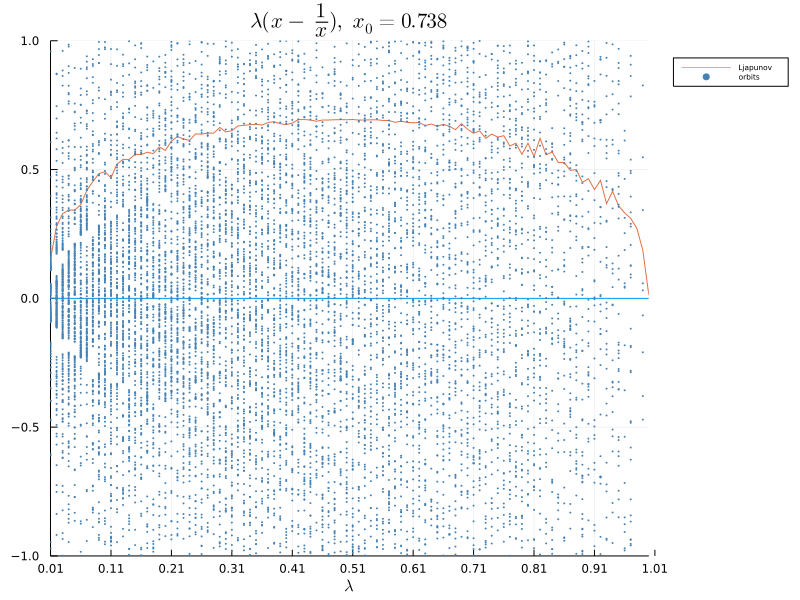

In [15]:
rajzol(Boole(0.01:0.01:1),_ylims=(-1,1),_saveit=false)